# Fragestellungen

- Welche Programmiersprachen werden am häufigsten verwendet?
- Welche Tools werden am häufigsten verwendet?
- Welche Python Libraries werden am häufigsten verwendet?
- Wo und wie oft wird Machine Learning in der Industrie eingesetzt?
- Welche Soft Skills werden am häufigsten gefordert?
- Welche Abschlüsse werden vorausgesetzt?
- Wieviel Berufserfahrung wird vorausgesetzt?
- Hat die Größe eines Unternehmens einen Einfluss auf die gesuchten Positionen?
- Welche Attribute erhöhen die Home Office Wahrscheinlichkeit?
- In welchen Regionen Deutschlands werden die meisten Data Science Jobs angeboten?
- Welche Attribute beeinflussen das Gehalt einer Stelle?

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_wide = pd.read_csv("../data/data_wide.csv")
df_wide = df_wide.loc[df_wide["title_category"] != "Others"]
df_wide.head()

,link,company,title,content,rating,num_ratings,company_link,release_date,company_size,permanent_employment,...,creativity,leadership,flexibility,business_focus,initiative,structured_working,little_experience,much_experience,no_experience_information,some_experience
0,https://www.stepstone.de/stellenangebote--Anal...,BearingPoint GmbH,Analyst Data Science & Artificial Intelligence...,Design your own career.Make your point @ Beari...,3.9,312 Bewertungen,https://www.stepstone.de/cmp/de/BearingPoint-G...,2022-06-03,2501-5000,True,...,False,False,False,False,False,False,False,False,True,False
1,https://www.stepstone.de/stellenangebote--Mana...,BIG direkt gesund,Manager (m/w/d) Data Science & Statistik,Direkter geht Karriere nicht.Einstieg bei der ...,4.3,16 Bewertungen,NaN,2022-06-03,NaN,True,...,False,False,False,False,False,False,False,False,True,False
2,https://www.stepstone.de/stellenangebote--Mana...,BIG direkt gesund,Manager (m/w/d) Data Science & Statistik,Direkter geht Karriere nicht.Einstieg bei der ...,4.3,16 Bewertungen,NaN,2022-06-03,NaN,True,...,False,False,False,False,False,False,False,False,True,False
3,https://www.stepstone.de/stellenangebote--Data...,METRO Markets GmbH,Data Science Lead,We create the future of B2B commerce by giving...,NaN,NaN,NaN,2022-06-01,NaN,True,...,False,False,True,False,False,False,False,True,False,False
4,https://www.stepstone.de/stellenangebote--Busi...,R+V Allgemeine Versicherung AG,Business Analyst / Data Science (m/w/d),Wie sich die Versicherung von morgen anfühlen ...,4.4,247 Bewertungen,https://www.stepstone.de/cmp/de/R-V-Allgemeine...,2022-06-01,"10,001+",True,...,False,False,False,False,True,False,False,False,True,False


In [3]:
df_wide.columns

Index(['link', 'company', 'title', 'content', 'rating', 'num_ratings',
       'company_link', 'release_date', 'company_size', 'permanent_employment',
       ...
       'creativity', 'leadership', 'flexibility', 'business_focus',
       'initiative', 'structured_working', 'little_experience',
       'much_experience', 'no_experience_information', 'some_experience'],
      dtype='object', length=103)

Die Daten enthalten eine Reihe verschiedener Attribute. Für viele der folgenden Analysen wird jedoch lediglich eine Teilmenge der Attribute benötigt. Daher wird an dieser Stelle ein zusätzlicher Spaltenindex eingeführt, der die Attribute in verscheidene Gruppen einteilt und eine einfachere Filterung ermöglicht.

In [4]:
groups = 21*["general_info"] + 18*["languages"] + 19*["technologies"] + 14*["libraries"] + 4*["education"] + 5*["degree"] + 8*["knowledge"] + 10*["soft_skills"] + 4*["experience"]
df_wide.columns = pd.MultiIndex.from_arrays([groups, df_wide.columns])
df_wide.head(1)

general_info                     \
                                                link            company   
0  https://www.stepstone.de/stellenangebote--Anal...  BearingPoint GmbH   

                                                      \
                                               title   
0  Analyst Data Science & Artificial Intelligence...   

                                                                              \
                                             content rating      num_ratings   
0  Design your own career.Make your point @ Beari...    3.9  312 Bewertungen   

                                                                   \
                                        company_link release_date   
0  https://www.stepstone.de/cmp/de/BearingPoint-G...   2022-06-03   

                                     ... soft_skills                         \
  company_size permanent_employment  ...  creativity leadership flexibility   
0    2501-5000                 True  ...       False      False       False   

                                                      experience  \
  business_focus initiative structured_working little_experience   
0          False      False              False             False   

                                                             
  much_experience no_experience_information some_experience  
0           False                      True           False  

[1 rows x 103 columns]

## Welche Programmiersprachen werden am häufigsten verwendet?

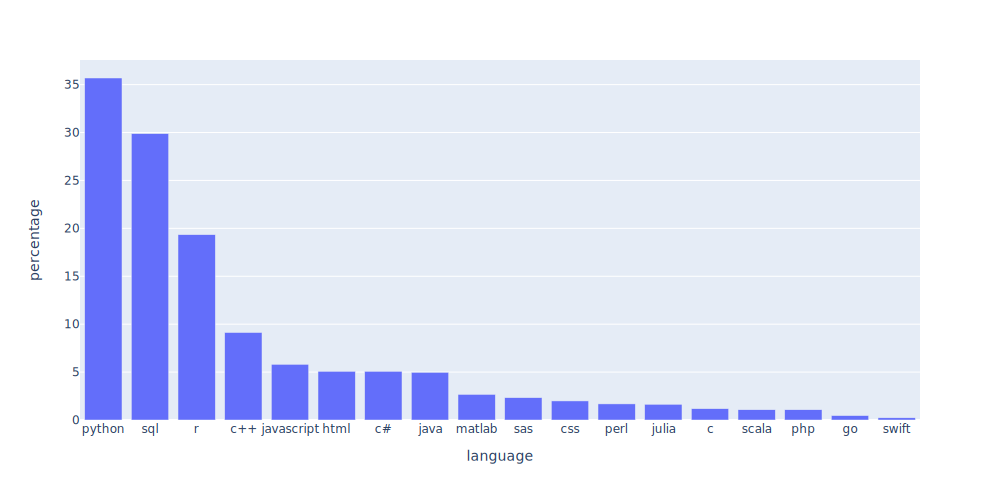

In [5]:
percentages = df_wide["languages"].mean().apply(lambda x: round(x*100,2)).sort_values(ascending=False)
fig = px.bar(percentages, labels={"value": "percentage", "index": "language"}, width=1000, height=500)
fig.update_layout(showlegend=False)
fig.show("svg")

Für eine bessere Übersichtlichkeit werden in der folgenden sowie auch in allen weiteren Analysen bei der Unterteilung in verschiedene Jobtitel jeweils nur die häufigsten Kategorien verwendet.

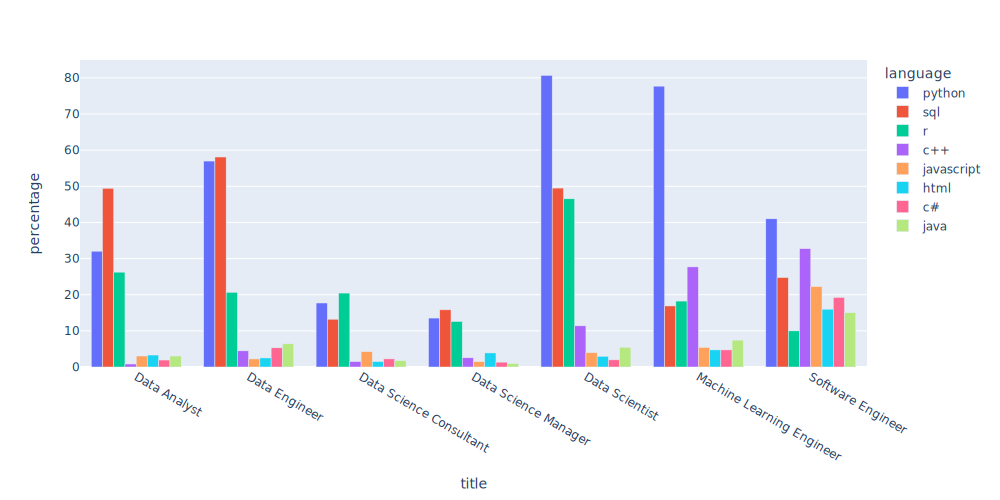

In [6]:
df_selected = df_wide["languages"][["python", "sql", "r", "c++", "javascript", "html", "c#", "java"]].groupby(
    df_wide["general_info", "title_category"]).mean().apply(lambda x: round(x*100,2))
df_selected.index.set_names(["title"], inplace=True)
fig = px.bar(df_selected, barmode="group", labels={"value": "percentage", "variable": "language"}, width=1000, height=500)
fig.show("svg")

Gewonnene Erkenntnisse:
- die verwendeten Programmiersprachen schwanken stark zwischen den einzelnen Jobtiteln
- Python, R und Sql werden unabhängig vom Jobtitel am häufigsten verwendet
    - in Jobs mit größerem Fokus auf Programmierung wie Machine Learning Engineer oder Software Engineer wird Python gegenüber R jedoch bevorzugt
    - in Positionen als Analyst, Consultant oder Manager ist die Verteilung hingegen ausgeglichen
- andere Programmiersprachen sind allgemein deutlich weniger weit verbreitet
    - lediglich als Machine Learning Engineer oder Software Engineer werden teilweise noch weitere Sprachen wie z.B. C++ erwartet

## Welche Tools werden am häufigsten verwendet?

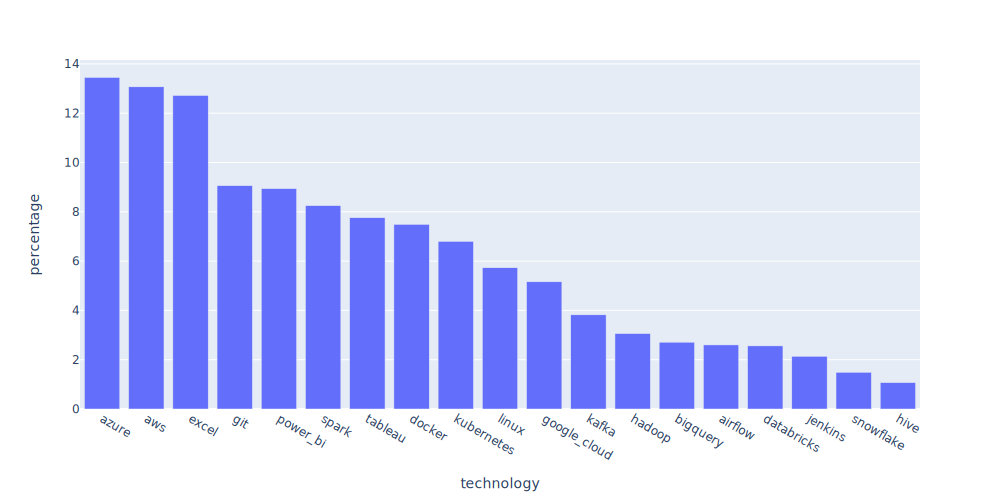

In [7]:
percentages = df_wide["technologies"].mean().apply(lambda x: round(x*100,2)).sort_values(ascending=False)
fig = px.bar(percentages, labels={"value": "percentage", "index": "technology"}, width=1000, height=500)
fig.update_layout(showlegend=False)
fig.show("svg")

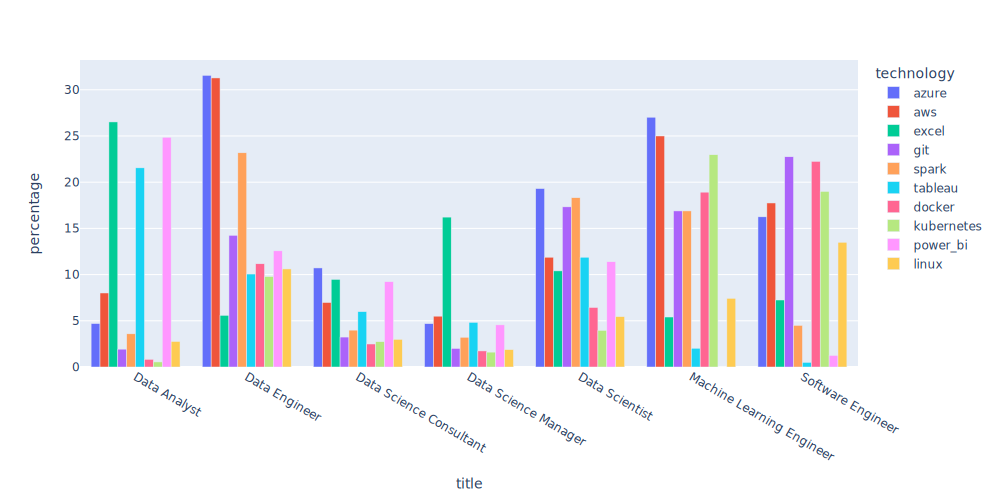

In [8]:
df_selected = df_wide["technologies"][["azure", "aws", "excel", "git", "spark", "tableau", "docker", "kubernetes", "power_bi", "linux"]].groupby(
    df_wide["general_info", "title_category"]).mean().apply(lambda x: round(x*100,2))
df_selected.index.set_names(["title"], inplace=True)
fig = px.bar(df_selected, barmode="group", labels={"value": "percentage", "variable": "technology"}, width=1000, height=500)
fig.show("svg")

Gewonnene Erkenntnisse:
- bei den verwendeten Technologien lassen sich grob in drei Gruppen einteilen
    - für einen Data Engineer, Data Scientist, Machine Learning Engineer oder Software Engineer ist die Beherrschung vieler unterschiedlicher Technologien erforderlich
        - eine Plattform für Cloud Computing (z.B. Azure oder AWS)
        - Git zur Versionskontrolle und Kolaboration mit anderen Teammitgliedern
        - Frameworks zur Verarbeitung riesiger Datenmengen (z.B. Spark)
        - Frameworks zur Containerisierung (Docker und Kubernetes)
    - für einen Data Science Consultant oder Data Science Manager sind Technologien eher zweitrangig
    - als Data Analyst wird vor allem Software zur Visualisierung der Daten (Tableau, Power BI oder Excel) benötigt

## Welche Python Libraries werden am häufigsten verwendet?

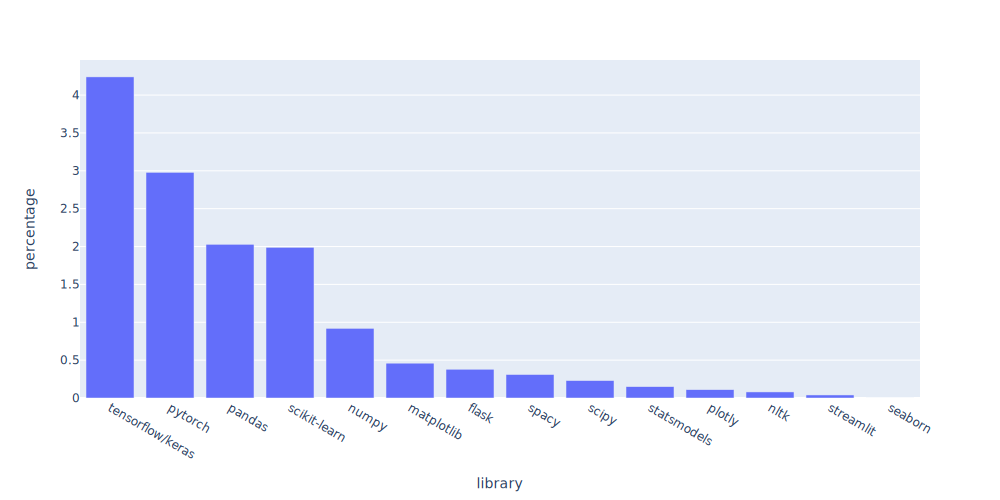

In [9]:
percentages = df_wide["libraries"].mean().apply(lambda x: round(x*100,2)).sort_values(ascending=False)
fig = px.bar(percentages, labels={"value": "percentage", "index": "library"}, width=1000, height=500)
fig.update_layout(showlegend=False)
fig.show("svg")

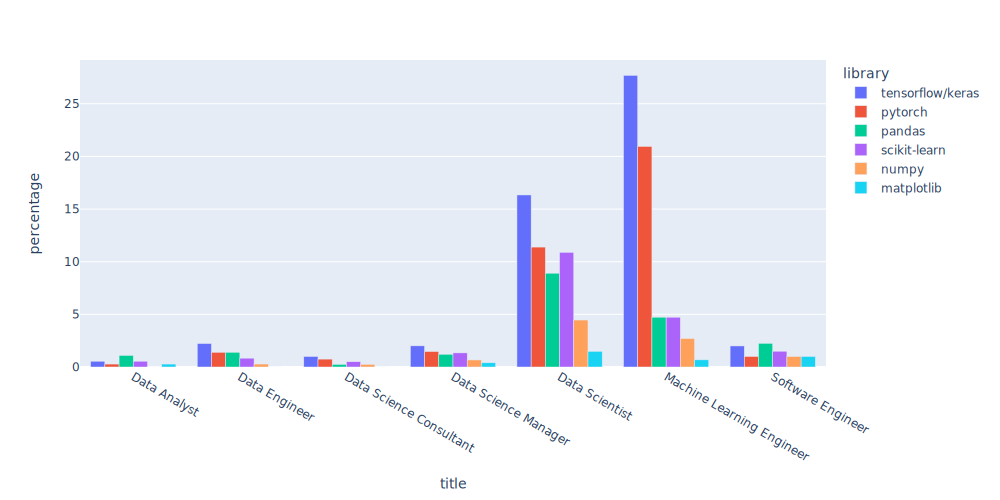

In [10]:
df_selected = df_wide["libraries"][["tensorflow/keras", "pytorch", "pandas", "scikit-learn", "numpy", "matplotlib"]].groupby(
    df_wide["general_info", "title_category"]).mean().apply(lambda x: round(x*100,2))
df_selected.index.set_names(["title"], inplace=True)
fig = px.bar(df_selected, barmode="group", labels={"value": "percentage", "variable": "library"}, width=1000, height=500)
fig.show("svg")

Gewonnene Erkenntisse:
- nur ein geringer Anteil der Jobanzeigen gibt Python Libraries mit an 
    - es kann jedoch sein, dass einige Anzeige diese unter Python bereits mit einbeziehen und deshalb nicht nocheinmal explizit mit angeben
- lediglich bei Data Scientists und Machine Learning Engineers werden bestimmte Libraries regelmäßig gefordert
    - Deep Learning Libraries wie Tensorflow/Keras und Pytorch
        - Tensorflow behält hier aktuell noch die Oberhand
    - Pandas für effiziente Datenmanipulation
    - Scikit-Learn für klassische Machine Learning Modelle

## Wo und wie oft wird Machine Learning in der Industrie eingesetzt?

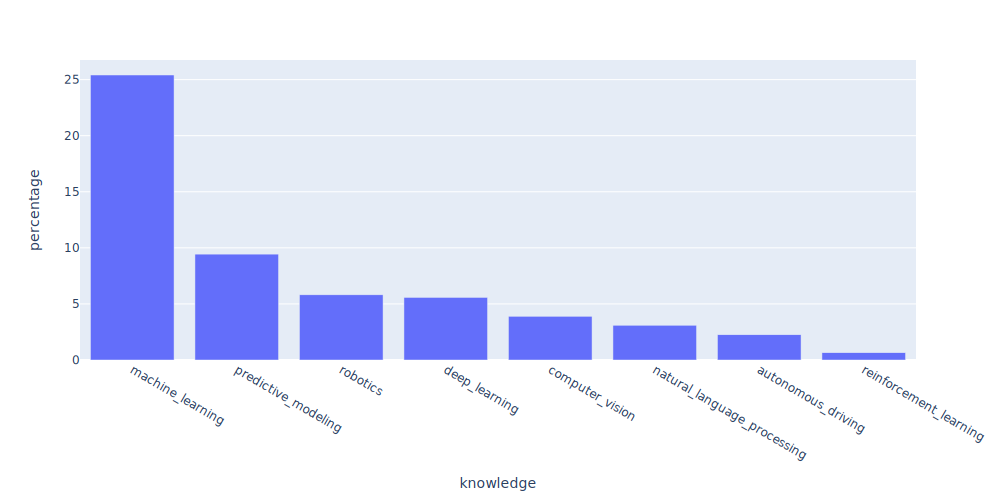

In [11]:
percentages = df_wide["knowledge"].mean().apply(lambda x: round(x*100,2)).sort_values(ascending=False)
fig = px.bar(percentages, labels={"value": "percentage", "index": "knowledge"}, width=1000, height=500)
fig.update_layout(showlegend=False)
fig.show("svg")

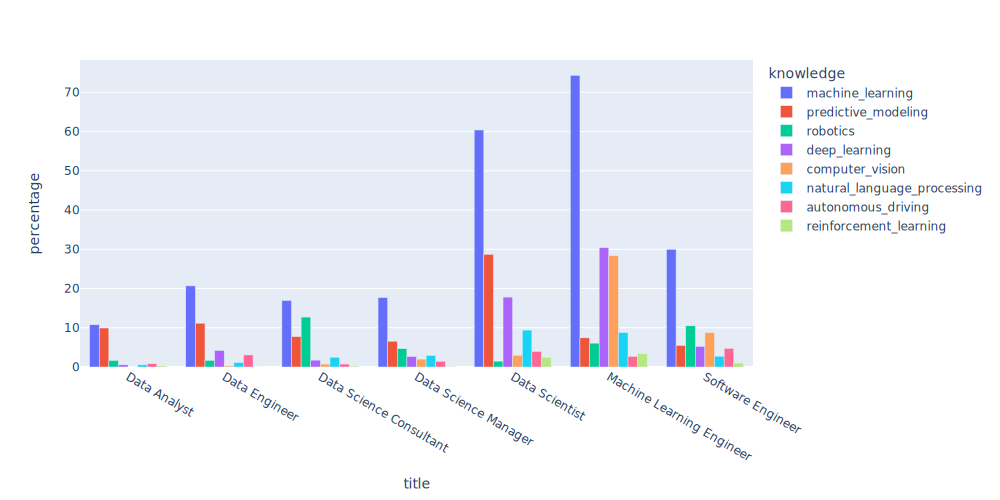

In [12]:
df_selected = df_wide["knowledge"][["machine_learning", "predictive_modeling", "robotics", "deep_learning", "computer_vision", "natural_language_processing", "autonomous_driving", "reinforcement_learning"]].groupby(
    df_wide["general_info", "title_category"]).mean().apply(lambda x: round(x*100,2))
df_selected.index.set_names(["title"], inplace=True)
fig = px.bar(df_selected, barmode="group", labels={"value": "percentage", "variable": "knowledge"}, width=1000, height=500)
fig.show("svg")

Gewonnene Erkenntisse:
- Machine Learning wird lediglich in einem Viertel der Jobanzeigen mit angegeben
    - für Data Scientists und Machine Learning Engineers ist dieses Thema jedoch deutlich relevanter als bei anderen Jobs
- bei lediglich einem Fünftel dieser Machine Learning Anwendungen handelt es sich um Deep Learning
    - ein Großteil der aktuellen Anwendungen bezieht sich aktuell auf Predictive Modeling mittels klassischer Algortihmen
    - nur unter den Machine Learning Engineers existieren mehrere Jobanzeigen, welche Deep Learning im Bereich Computer Vision anwenden

## Welche Soft Skills werden am häufigsten gefordert?

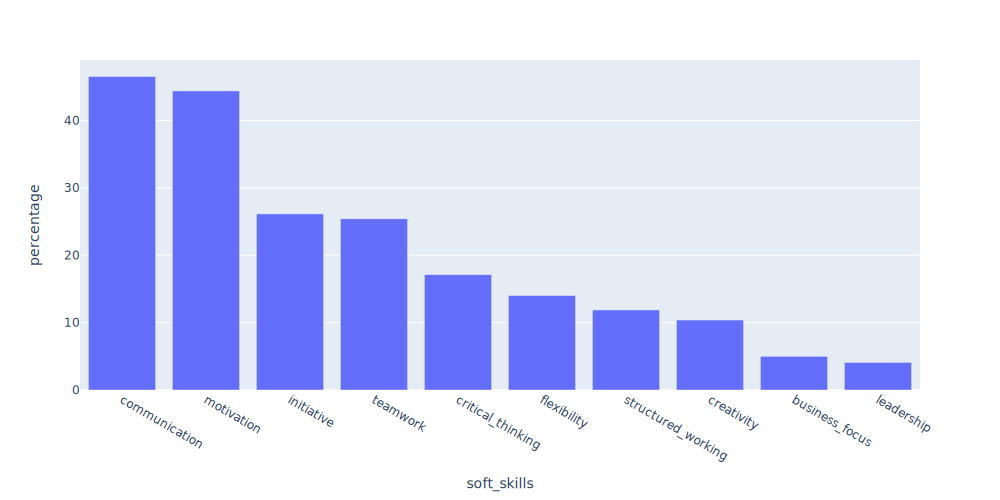

In [13]:
percentages = df_wide["soft_skills"].mean().apply(lambda x: round(x*100,2)).sort_values(ascending=False)
fig = px.bar(percentages, labels={"value": "percentage", "index": "soft_skills"}, width=1000, height=500)
fig.update_layout(showlegend=False)
fig.show("svg")

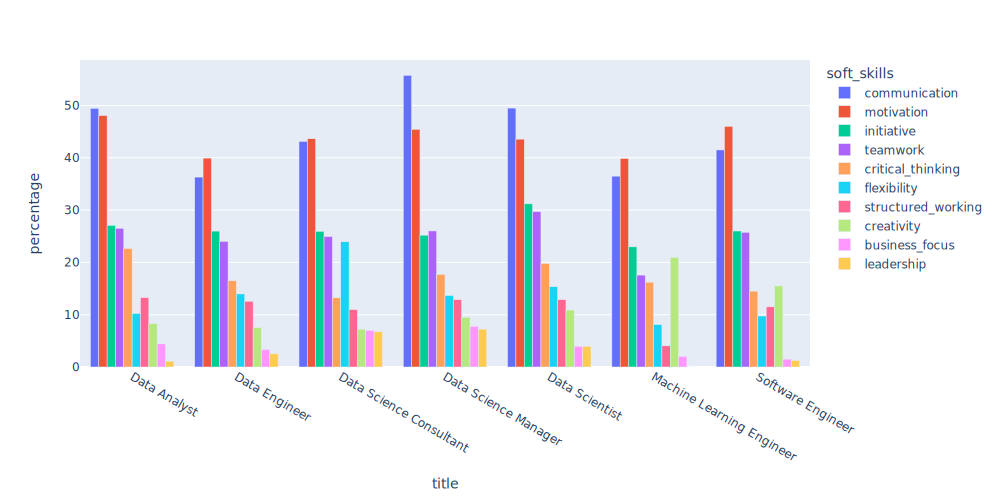

In [14]:
df_selected = df_wide["soft_skills"][["communication", "motivation", "initiative", "teamwork", "critical_thinking", "flexibility", "structured_working", "creativity", "business_focus", "leadership"]].groupby(
    df_wide["general_info", "title_category"]).mean().apply(lambda x: round(x*100,2))
df_selected.index.set_names(["title"], inplace=True)
fig = px.bar(df_selected, barmode="group", labels={"value": "percentage", "variable": "soft_skills"}, width=1000, height=500)
fig.show("svg")

Gewonnene Erkenntnisse:
- die am am häufigsten geforderten Soft Skills sind Kommunikation und Motivation, gefolgt von Eigeninitiative und Teamwork
    - die Verteilung der Soft Skills ist bei allen Positionen sehr ähnlich
- kleinere Abweichungen existieren jedoch
    - für Data Science Manager wird Kommunikation, Business Focus und Leadership vergleichweise öfter gefordert als bei anderen Jobs
    - bei einem Consultant steht Flexibilität (z.B. Reisebereitschaft) im Vordergrund
    - auffällig ist auch, dass bei Machine Learning Engineers vergleichsweise oft Kreativität gefordert wird
- insgesamt ist es bei den Soft Skills schwer deutliche Unterschiede festzustellen, da diese unabhängig von der exakten Position stets wünschenswert sind

## Welche Abschlüsse werden vorausgesetzt?

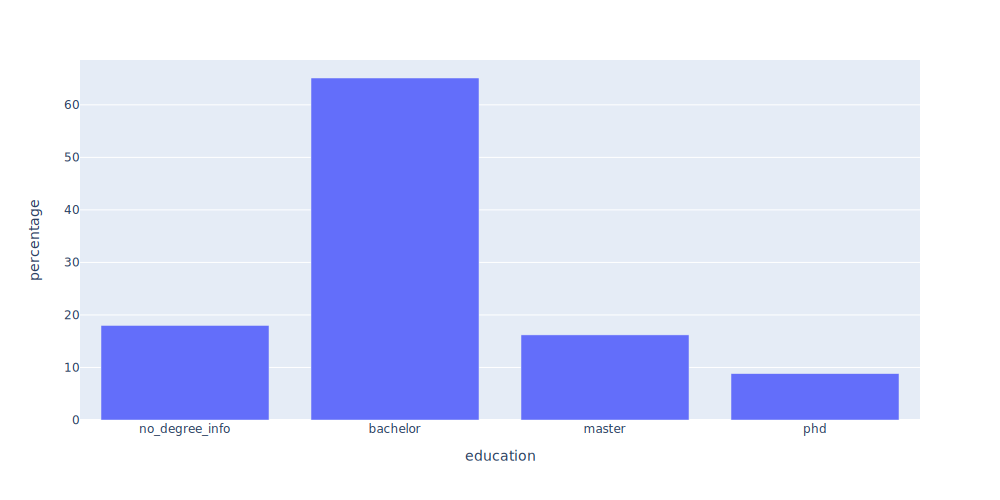

In [15]:
percentages = df_wide["education"][["no_degree_info", "bachelor", "master", "phd"]].mean().apply(lambda x: round(x*100,2))
fig = px.bar(percentages, labels={"value": "percentage", "index": "education"}, width=1000, height=500)
fig.update_layout(showlegend=False)
fig.show("svg")

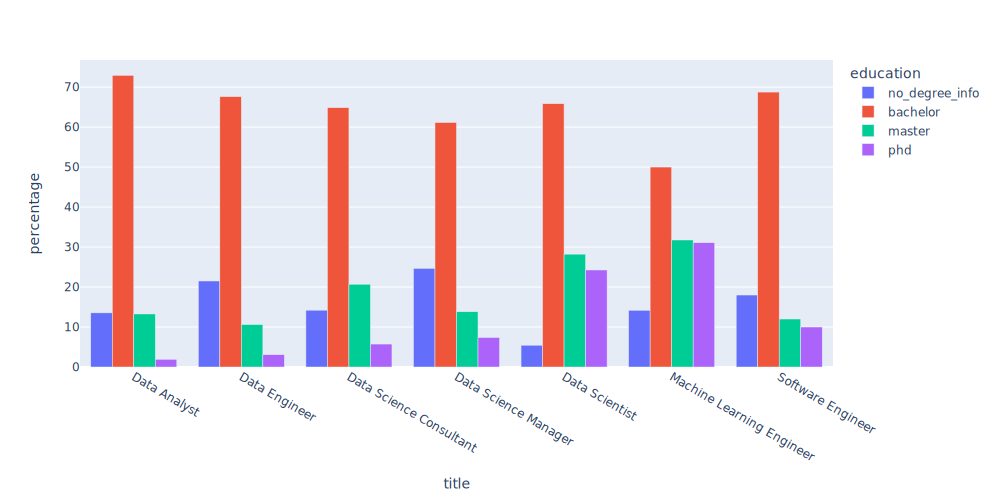

In [16]:
df_selected = df_wide["education"][["no_degree_info", "bachelor", "master", "phd"]].groupby(
    df_wide["general_info", "title_category"]).mean().apply(lambda x: round(x*100,2))
df_selected.index.set_names(["title"], inplace=True)
fig = px.bar(df_selected, barmode="group", labels={"value": "percentage", "variable": "education"}, width=1000, height=500)
fig.show("svg")

Gewonnene Erkenntnisse:
- für einen Großteil der Positionen wird ein abgeschlossenes Studium benötigt
    - das Verhältnis zwischen Bachelor und Master ist in dieser Analyse leider nicht repräsentativ
        - alle Jobanzeigen, bei denen lediglich ein abgeschlossenes Studium gefordert wird, wurden hier unter "bachelor" eingeordnet
        - theoretisch kann hiermit jedoch in manchen Fällen auch ein Masterstudium gemeint sein
- die Verteilung der Anforderungen ist zwischen den Jobtiteln reltiv ähnlich
    - auffällig ist, dass bei Data Scientist und Machine Learning Engineer vergleichsweise häufig explizit ein Master oder Phd gefordert wird

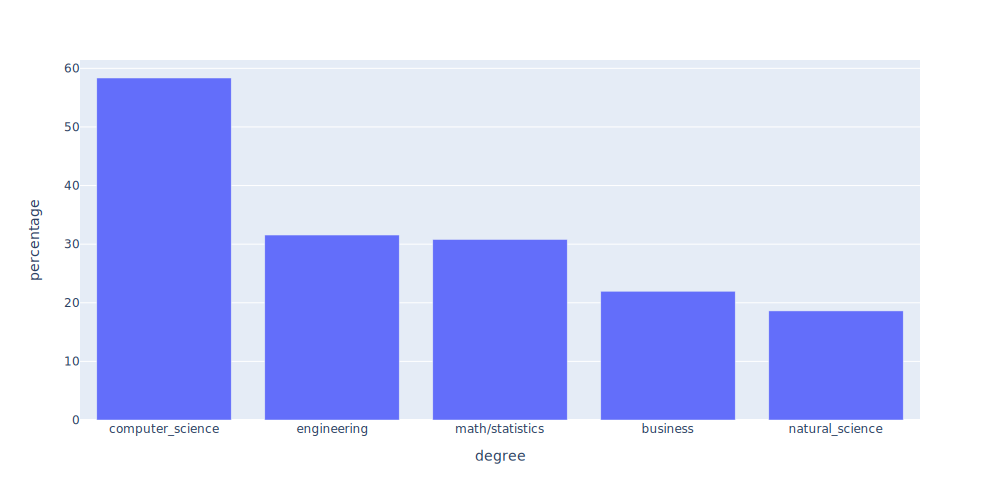

In [17]:
percentages = df_wide["degree"].mean().apply(lambda x: round(x*100,2)).sort_values(ascending=False)
fig = px.bar(percentages, labels={"value": "percentage", "index": "degree"}, width=1000, height=500)
fig.update_layout(showlegend=False)
fig.show("svg")

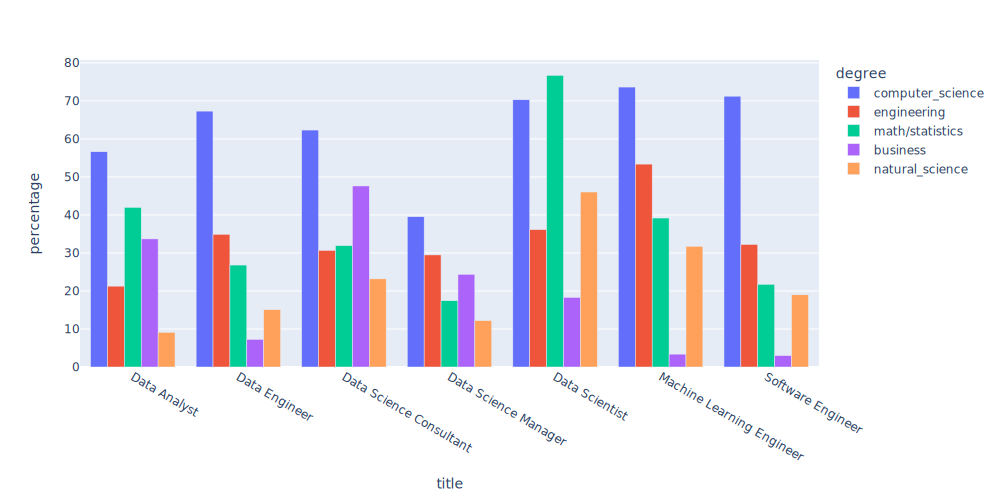

In [18]:
df_selected = df_wide["degree"][["computer_science", "engineering", "math/statistics", "business", "natural_science"]].groupby(
    df_wide["general_info", "title_category"]).mean().apply(lambda x: round(x*100,2))
df_selected.index.set_names(["title"], inplace=True)
fig = px.bar(df_selected, barmode="group", labels={"value": "percentage", "variable": "degree"}, width=1000, height=500)
fig.show("svg")

Gewonnene Erkenntnisee:
- ein Computer Science Studium ist die beste Wahl, um einen Data Science Job zu bekommen
- natürlich wäre ein Data Science Studium ebenfalls für die meisten Jobs zulässig
    - da der Begriff "Data Science" in den meisten Jobbeschreibungen sowieso mehrfach vorkommt, wäre es schwierig nur die Vorkommen zu extrahieren, die sich auf ein Studium beziehen
- für den Beruf des Data Scientists wird ein vergleichsweise hoher Wert auf Mathematik/Statistik-Kenntnisse gelegt
- ein Business Degree eignet sich vor allem für eine Anstellung als Consultant, Manager oder Analyst

## Wieviel Berufserfahrung wird vorausgesetzt?

Aufgrund der relativ kleinen Stichprobengrößen für exakte Jahresangaben, wurde die Berufserfahrung im Rahmen der Vorverarbeitung in drei Kategorien aufgeteilt:
- little experience: 0-2 years
- some experience: 3-4 years
- much experience: 5+ years

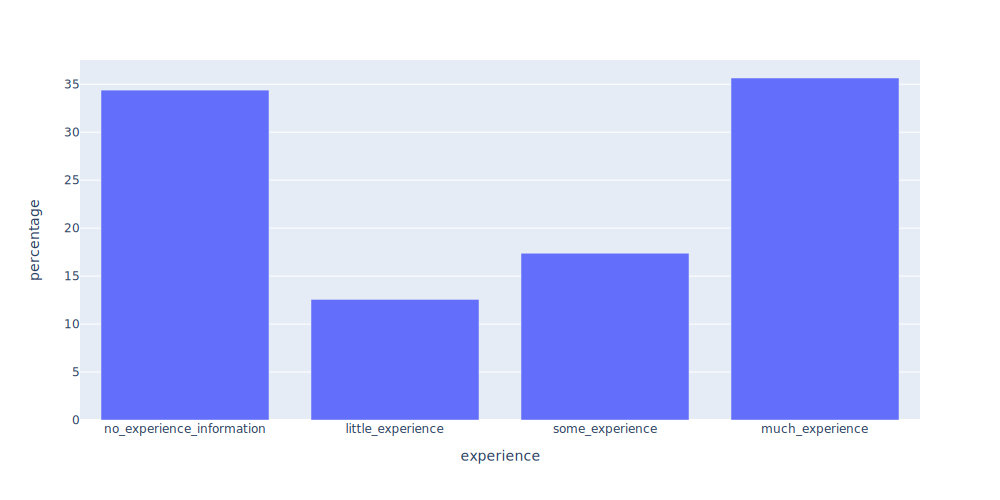

In [19]:
percentages = df_wide["experience"][["no_experience_information", "little_experience", "some_experience", "much_experience"]].mean().apply(lambda x: round(x*100,2))
fig = px.bar(percentages, labels={"value": "percentage", "index": "experience"}, width=1000, height=500)
fig.update_layout(showlegend=False)
fig.show("svg")

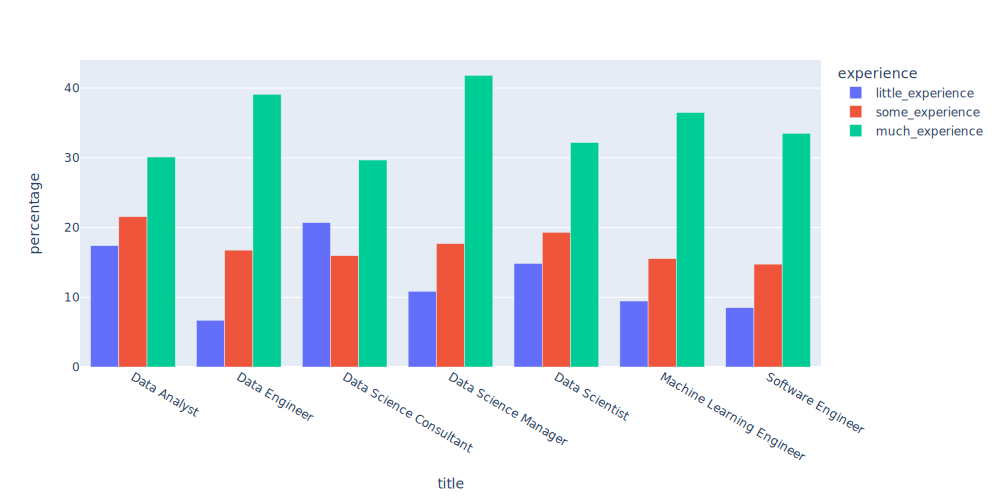

In [20]:
df_selected = df_wide["experience"][["little_experience", "some_experience", "much_experience"]].groupby(
    df_wide["general_info", "title_category"]).mean().apply(lambda x: round(x*100,2))
df_selected.index.set_names(["title"], inplace=True)
fig = px.bar(df_selected, barmode="group", labels={"value": "percentage", "variable": "experience"}, width=1000, height=500)
fig.show("svg")

Gewonnene Erkenntisse:
- die Verteilung der Berufserfahrung ist für alle Jobtitel sehr ähnlich
    - Bewerber mit längerer Berufserfahrung werden vermehrt gesucht
- als Berufseinsteiger hat man die besten Chancen als Data Analyst oder Data Science Consultant einzusteigen
- interessant ist, dass auch einige Managerpositionen nur wenig Berufserfahrung erfordern

## Hat die Größe eines Unternehmens einen Einfluss auf die gesuchten Positionen?

In [21]:
df_wide = df_wide.droplevel(0, axis=1)
df_wide.head(1)

,link,company,title,content,rating,num_ratings,company_link,release_date,company_size,permanent_employment,...,creativity,leadership,flexibility,business_focus,initiative,structured_working,little_experience,much_experience,no_experience_information,some_experience
0,https://www.stepstone.de/stellenangebote--Anal...,BearingPoint GmbH,Analyst Data Science & Artificial Intelligence...,Design your own career.Make your point @ Beari...,3.9,312 Bewertungen,https://www.stepstone.de/cmp/de/BearingPoint-G...,2022-06-03,2501-5000,True,...,False,False,False,False,False,False,False,False,True,False


In [22]:
df_wide["company_size"].value_counts()

10,001+        1055
2501-5000       235
1001-2500       172
5001-10,000     155
51-250          117
251-500         107
501-1000        100
0-50             42
Name: company_size, dtype: int64

In [23]:
size_groups = df_wide["company_size"].map({"10,001+": "big", "5001-10,000": "medium", "2501-5000": "medium", "1001-2500": "medium", 
                                           "501-1000": "small", "251-500": "small", "51-250": "small", "0-50": "small"})

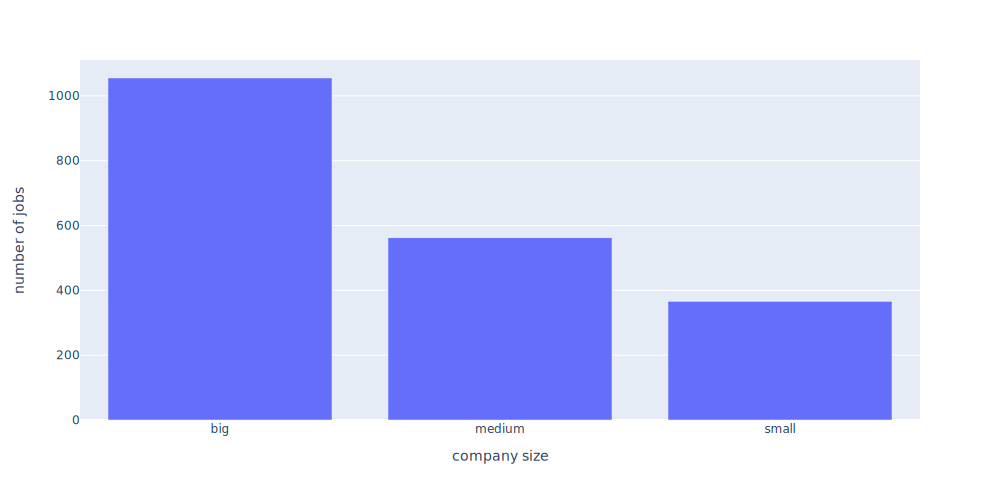

In [24]:
fig = px.bar(size_groups.value_counts(), labels={"value": "number of jobs", "index": "company size"}, width=1000, height=500)
fig.update_layout(showlegend=False)
fig.show("svg")

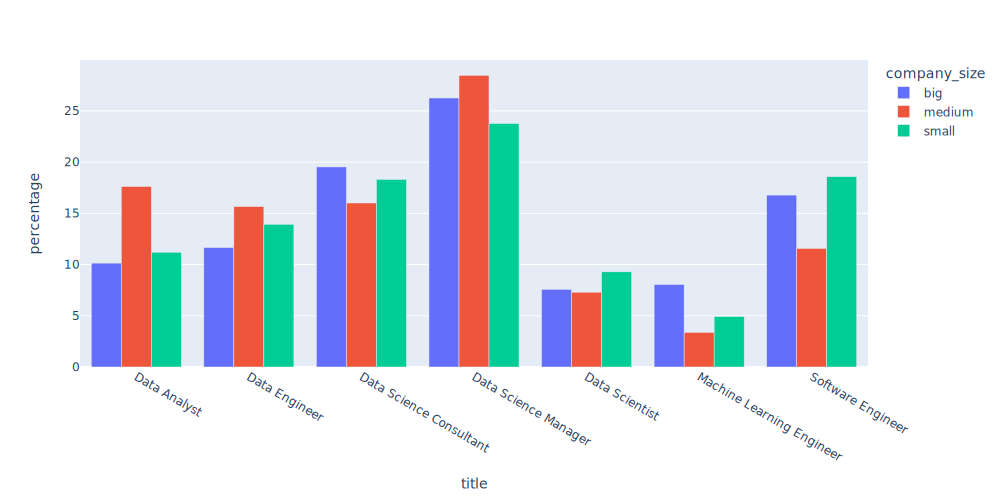

In [25]:
# Normalisierung über die Firmengröße ==> alle Balken einer Farbe summieren sich auf zu 1
percentages = pd.crosstab(df_wide["title_category"], size_groups, normalize="columns").apply(lambda x: round(x*100, 2))
fig = px.bar(percentages, barmode="group", labels={"value": "percentage", "title_category": "title"}, width=1000, height=500)
fig.show("svg")

Gewonnene Erkenntnisse:
- auf den ersten Blick lässt sich kein relevantes Muster erkennen
- mittelgroße Unternehmen suchen vergleichsweise oft Data Analysts, kleine und große Unternehmen hingegen mehr Machine Learning Engineers und Software Engineers

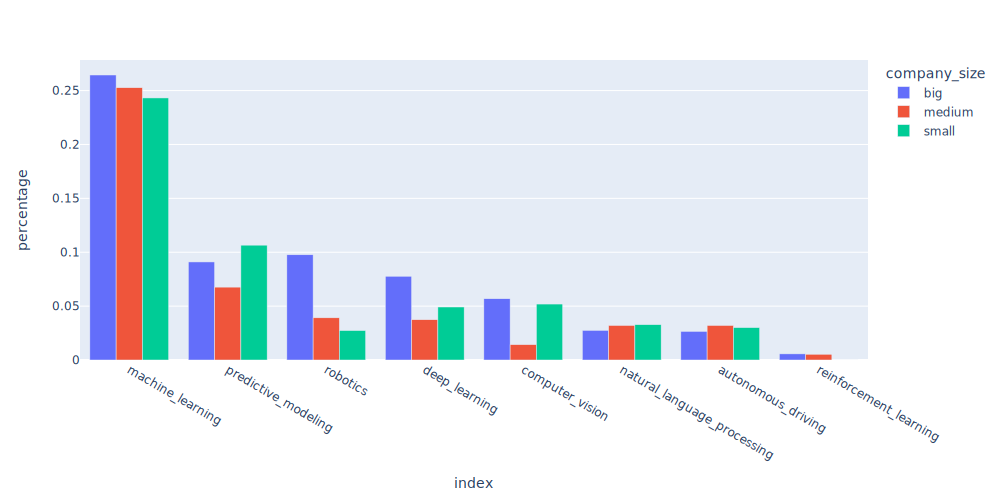

In [26]:
percentages = df_wide.groupby(size_groups)[["machine_learning", "predictive_modeling", "robotics", "deep_learning", "computer_vision", "natural_language_processing", "autonomous_driving", "reinforcement_learning"]].mean()
fig = px.bar(percentages.T, barmode="group", labels={"value": "percentage", "knowledge": "title"}, width=1000, height=500)
fig.show("svg")

Gewonnene Erkenntnisse:
- in größeren Unternehmen werden im Schnitt etwas mehr Stellen mit Wissen im Bereich Machine Learning gesucht
- es ist jedoch interessant zu sehen, dass kleine Unternehmen im Bereich Predictive Modeling, Deep Learning und Computer Vision mehr Jobs anbieten als mittelgroße

## Welche Attribute erhöhen die Home Office Wahrscheinlichkeit?

In [27]:
mean = df_wide["home_office_possible"].mean()*100
mean

38.0970576996561

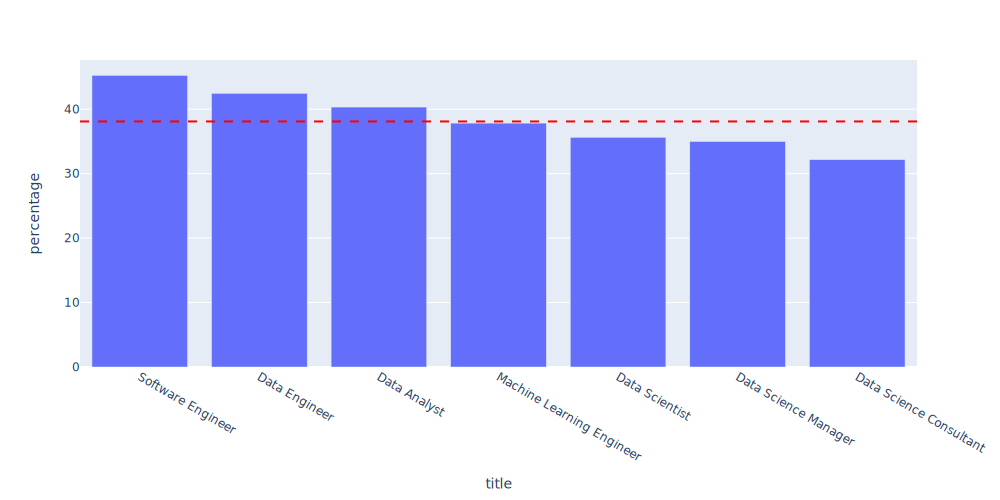

In [28]:
fig = px.bar(df_wide.groupby("title_category")["home_office_possible"].mean().sort_values(ascending=False).apply(lambda x: round(x*100,2)), labels={"value": "percentage", "title_category": "title"}, width=1000, height=500)
fig.add_hline(y=mean, line_color="red", line_dash="dash")
fig.update_layout(showlegend=False)
fig.show("svg")

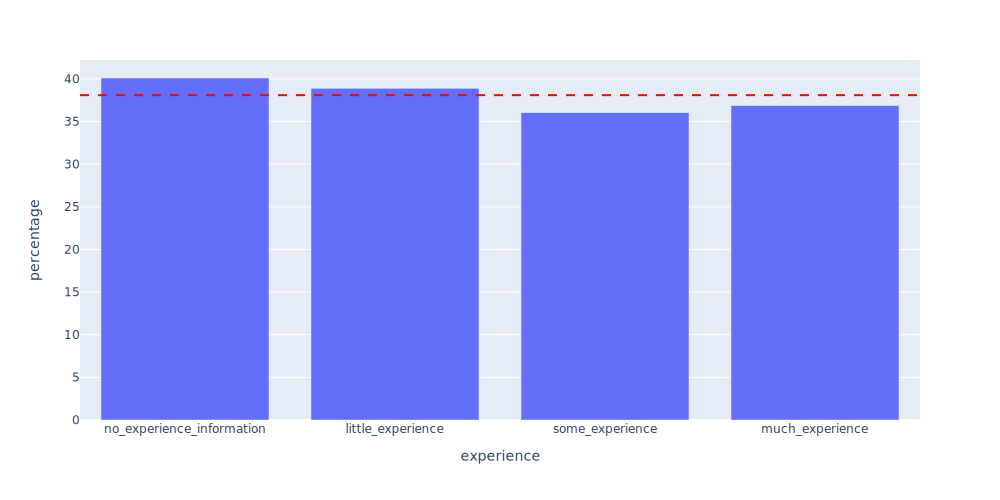

In [29]:
experience = df_wide[["no_experience_information", "little_experience", "some_experience", "much_experience"]].idxmax(axis=1)
percentages = df_wide.groupby(experience)["home_office_possible"].mean().apply(lambda x: round(x*100,2))[["no_experience_information", "little_experience", "some_experience", "much_experience"]]
fig = px.bar(percentages, labels={"value": "percentage", "index": "experience"}, width=1000, height=500)
fig.add_hline(y=mean, line_color="red", line_dash="dash")
fig.update_layout(showlegend=False)
fig.show("svg")

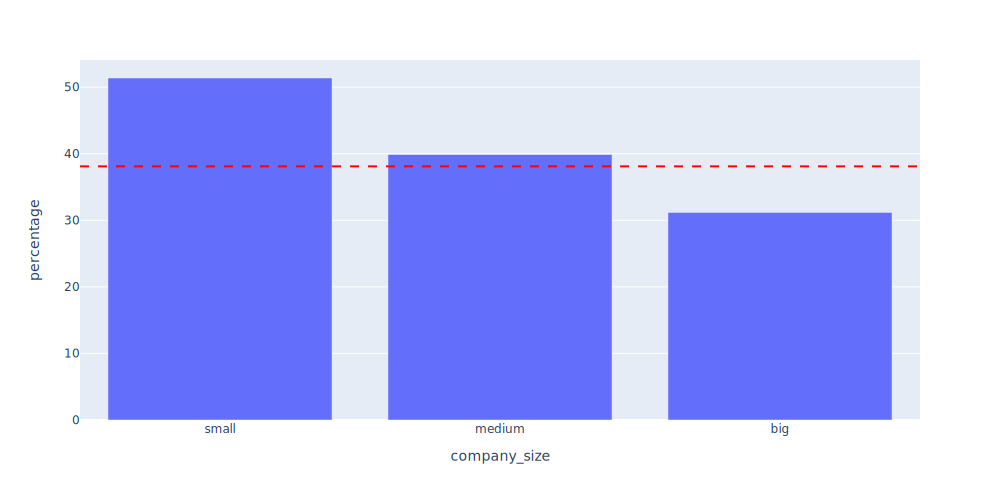

In [30]:
fig = px.bar(df_wide.groupby(size_groups)["home_office_possible"].mean().sort_values(ascending=False).apply(lambda x: round(x*100,2)), labels={"value": "percentage"}, width=1000, height=500)
fig.add_hline(y=mean, line_color="red", line_dash="dash")
fig.update_layout(showlegend=False)
fig.show("svg")

Gewonnene Erkentnisse:
- es existieren spürbare Unterschiede zwischen den verschiedenen Jobtiteln bezüglich Home Office
- das Erfahrungslevel der Person hat kaum einen Einfluss auf die Möglichkeit für Home Office
- je kleiner das Unternehmen ist, desto höher ist die Chance, den Job im Home Office zu erledigen

## In welchen Regionen Deutschlands werden die meisten Data Science Jobs angeboten?

In [31]:
df_long = pd.read_csv("../data/data_long.csv")
df_long.head()

,link,company,title,content,industry,rating,num_ratings,company_link,release_date,company_size,...,home_office_possible,part_time,full_time,title_category,experience_level,average_salary,location,latitude,longitude,region
0,https://www.stepstone.de/stellenangebote--Anal...,BearingPoint GmbH,Analyst Data Science & Artificial Intelligence...,Design your own career.Make your point @ Beari...,"Unternehmensberatg., Wirtschaftsprüfg., Recht",3.9,312 Bewertungen,https://www.stepstone.de/cmp/de/BearingPoint-G...,2022-06-03,2501-5000,...,True,False,True,Machine Learning Engineer,No Information,NaN,Walldorf,49.307822,8.64145,Baden-Württemberg
1,https://www.stepstone.de/stellenangebote--SAP-...,SAP SE,SAP IT Technology Consultant (f/m/d) AI Scient...,We are SAP\nSAP Intelligent Enterprise Solutio...,NaN,4.6,232 Bewertungen,NaN,2022-06-01,NaN,...,False,False,True,Data Science Consultant,No Information,NaN,Walldorf,49.307822,8.64145,Baden-Württemberg
2,https://www.stepstone.de/stellenangebote--Seni...,Deloitte,(Senior) Consultant Visual Analytics (m/w/d),Du machst den Unterschied. Ob im Business Audi...,"Unternehmensberatg., Wirtschaftsprüfg., Recht",4.2,470 Bewertungen,https://www.stepstone.de/cmp/de/Deloitte-92380...,2022-05-26,"10,001+",...,True,True,True,Data Science Consultant,Senior,NaN,Walldorf,49.307822,8.64145,Baden-Württemberg
3,https://www.stepstone.de/stellenangebote--Seni...,BearingPoint GmbH,(Senior) Consultant Data Analytics und Data En...,Design your own career.Make your point @ Beari...,"Unternehmensberatg., Wirtschaftsprüfg., Recht",3.9,312 Bewertungen,https://www.stepstone.de/cmp/de/BearingPoint-G...,2022-06-03,2501-5000,...,False,False,True,Data Science Consultant,Senior,NaN,Walldorf,49.307822,8.64145,Baden-Württemberg
4,https://www.stepstone.de/stellenangebote--Anal...,BearingPoint GmbH,Analyst Anti-Financial Crime (m/w/d),Design your own career.Make your point @ Beari...,"Unternehmensberatg., Wirtschaftsprüfg., Recht",3.9,312 Bewertungen,https://www.stepstone.de/cmp/de/BearingPoint-G...,2022-05-25,2501-5000,...,False,False,True,Data Analyst,No Information,NaN,Walldorf,49.307822,8.64145,Baden-Württemberg


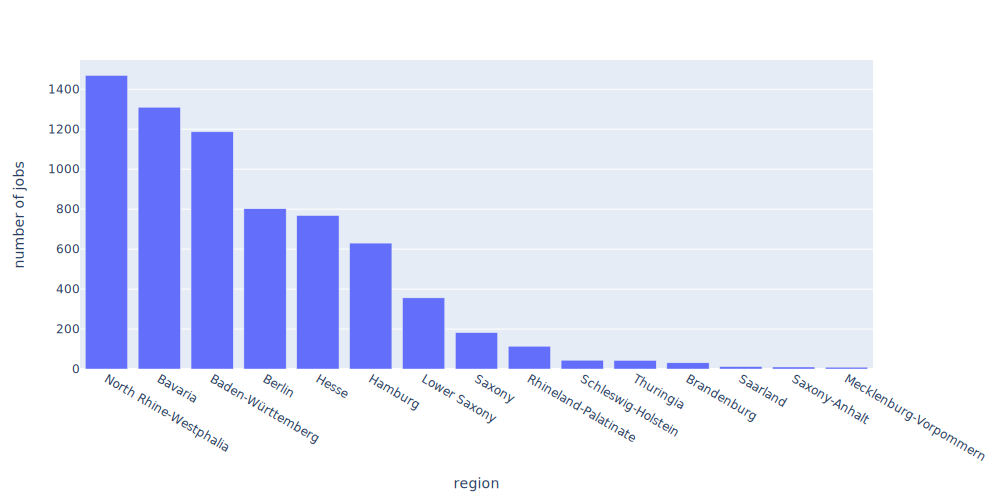

In [32]:
fig = px.bar(df_long["region"].value_counts(), labels={"value": "number of jobs", "index": "region"}, width=1000, height=500)
fig.update_layout(showlegend=False)
fig.show("svg")

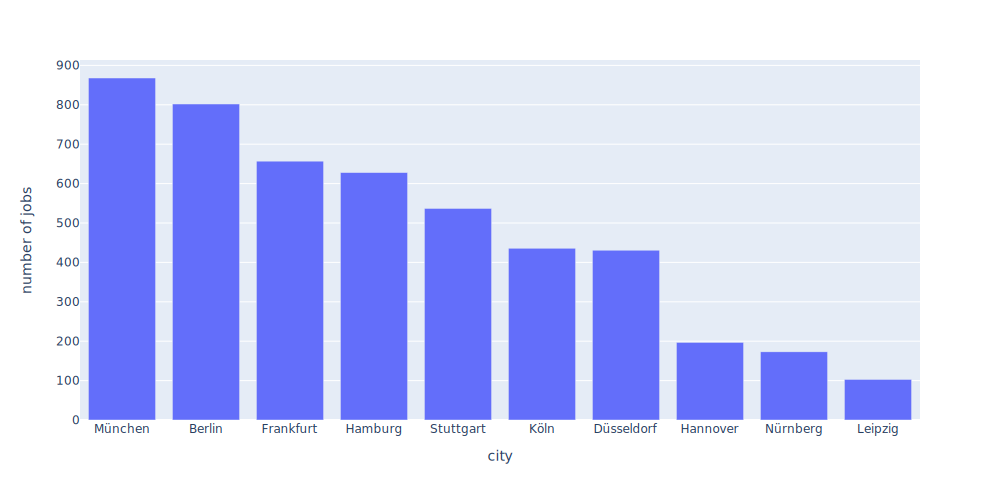

In [33]:
fig = px.bar(df_long["location"].value_counts().head(10), labels={"value": "number of jobs", "index": "city"}, width=1000, height=500)
fig.update_layout(showlegend=False)
fig.show("svg")

In [34]:
df_map = df_long.groupby(["location", "latitude", "longitude"], as_index=False)["link"].agg({"number of jobs": "count"})

df_map["size"] = np.log(df_map["number of jobs"] + 1)

fig = px.scatter_mapbox(df_map,
                        lat="latitude", lon="longitude",
                        hover_name="location",
                        hover_data={"latitude": False, "longitude": False, "size": False, "number of jobs": True},
                        color_discrete_sequence=["blue"],
                        mapbox_style="carto-positron",
                        size="size",
                        size_max=20,
                        zoom=5,
                        opacity=0.5,
                        center={"lat": 51, "lon": 10},
                        width=650, height=750)

# fig.show()

## Welche Attribute beeinflussen das Gehalt einer Stelle?

Bei den verwendeten Gehaltsangaben handelt es sich nicht im reale Gehälter sondern bereits um Prognosen eines von Stepstone entwickelten Machine Learning Modelles. Die Prognosen dieses Modelles besieren laut Stepstone auf drei Faktoren:
- Jobeigenschaften
- Arbeitgeberprofil
- Qualifikationen

In [35]:
df_salary = df_wide.loc[df_wide["average_salary"].notnull()]
df_salary.shape

(1687, 103)

#### Einfluss der Jobeingenschaften

Zu den Jobeigenschaften gehören:
- Jobtitel
- Erfahrungslevel
- work_type / contract_type

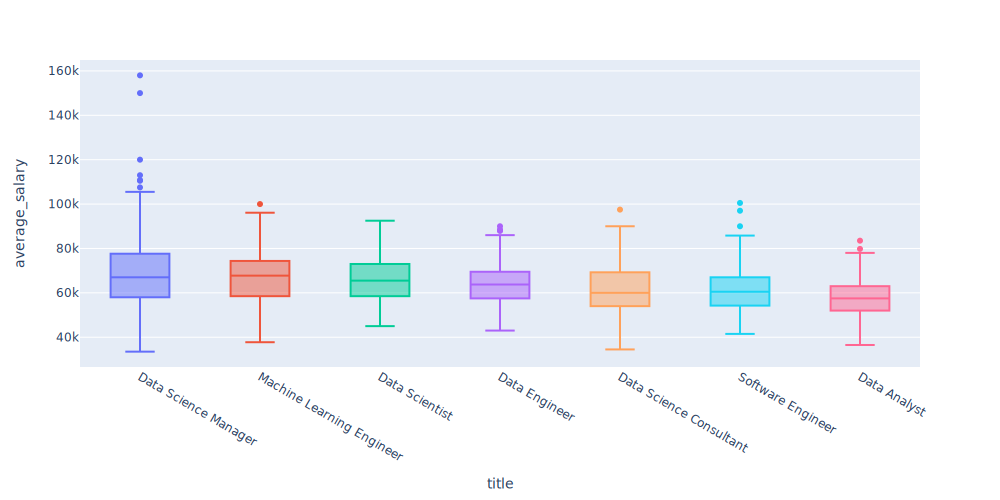

In [36]:
salaries = df_salary.groupby("title_category")["average_salary"].mean().sort_values(ascending=False)
fig = px.box(df_salary, x="title_category", y="average_salary", color="title_category", labels={"title_category": "title"}, width=1000, height=500,
            category_orders={"title_category": salaries.index})
fig.update_layout(showlegend=False)
fig.show("svg")

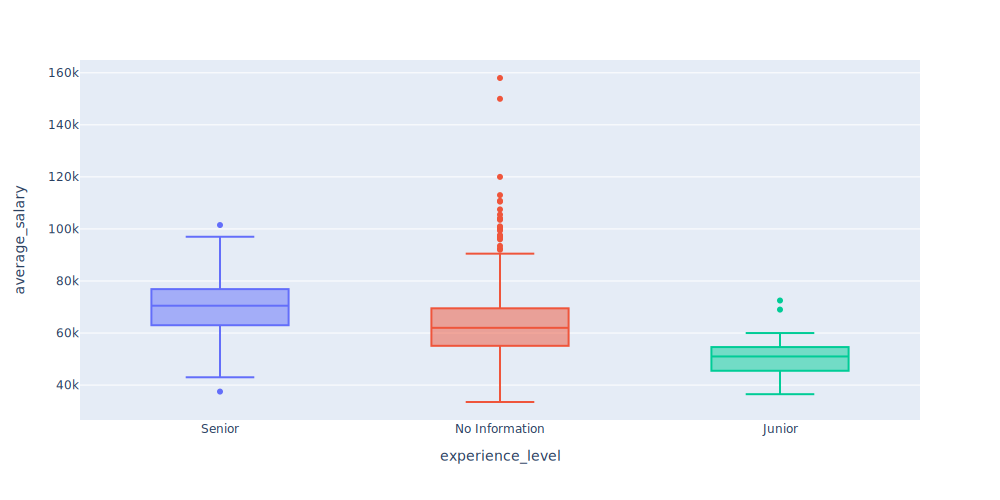

In [37]:
salaries = df_salary.groupby("experience_level")["average_salary"].mean().sort_values(ascending=False)
fig = px.box(df_salary, x="experience_level", y="average_salary", color="experience_level", width=1000, height=500,
            category_orders={"experience_level": salaries.index})
fig.update_layout(showlegend=False)
fig.show("svg")

Neben dem Jobtitel werden weitere Informationen in den Jobanzeigen mit angegeben:
- contract type (permanent employment / trainee)
- work type (full time, part time, home office possible)

Für viele dieser Angaben ist die gesammelte Stichprobe jedoch zu klein, um Rückschlüsse daraus ziehen zu können.

In [38]:
salaries = df_salary.groupby("permanent_employment")["average_salary"].agg(["mean", "count"]).sort_values("count", ascending=False)
salaries

,mean,count
permanent_employment,,
True,63742.938909,1686
False,72000.000000,1


In [39]:
salaries = df_salary.groupby("trainee")["average_salary"].agg(["mean", "count"]).sort_values("count", ascending=False)
salaries

,mean,count
trainee,,
False,63775.026754,1682
True,54600.000000,5


In [40]:
salaries = df_salary.groupby("full_time")["average_salary"].agg(["mean", "count"]).sort_values("count", ascending=False)
salaries

,mean,count
full_time,,
True,63743.828588,1686
False,70500.000000,1


In [41]:
salaries = df_salary.groupby("part_time")["average_salary"].agg(["mean", "count"]).sort_values("count", ascending=False)
salaries

,mean,count
part_time,,
False,63680.546875,1536
True,64432.284768,151


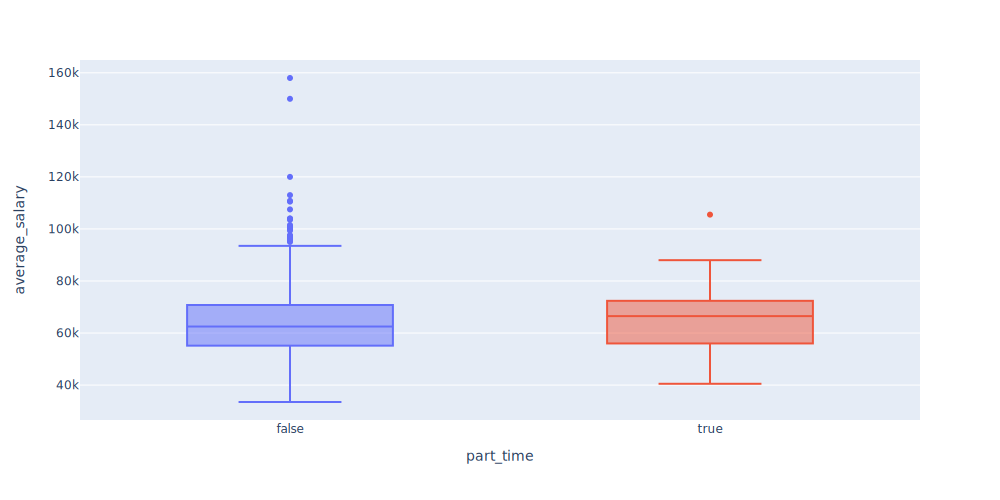

In [42]:
fig = px.box(df_salary, x="part_time", y="average_salary", color="part_time", width=1000, height=500,
            category_orders={"experience_level": salaries.index})
fig.update_layout(showlegend=False)
fig.show("svg")

In [43]:
salaries = df_salary.groupby("home_office_possible")["average_salary"].agg(["mean", "count"]).sort_values("count", ascending=False)
salaries

,mean,count
home_office_possible,,
False,65347.525510,980
True,61530.438472,707


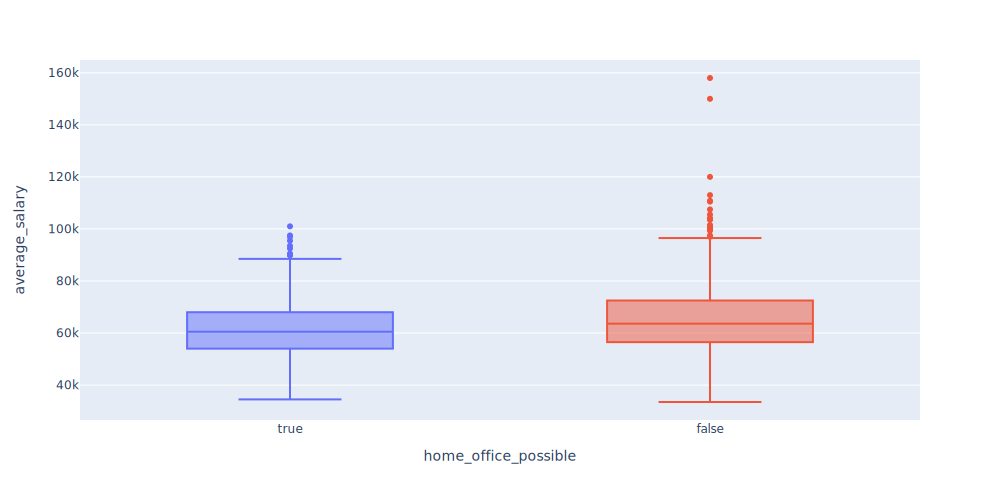

In [44]:
fig = px.box(df_salary, x="home_office_possible", y="average_salary", color="home_office_possible", width=1000, height=500,
            category_orders={"experience_level": salaries.index})
fig.update_layout(showlegend=False)
fig.show("svg")

Gewonnene Erkenntnisse:
- der Jobtitel besitzt einen großen Einfluss auf das Gehalt
- je größer das Erfahrungslevel, desto höher das Gehalt
- für die Features "permanent_employment", "trainee" und "full_time" exitieren zu wenig Datenpunkte für die jeweils schwächer repräsentierte Kategorie, um diese Features in das spätere Modell mit zu integrieren
    - die Informationen von "trainee" wurde im Rahmen der Vorverarbeitung außerdem bereits in das Feature "experience" integriert
- für das Feature "part_time" scheint keinen großen Unterschied auszumachen
- Jobs ohne Möglichkeit zum Home Office werden im Schnitt besser bezhalt zu werden

#### Einfluss des Arbeitgeberprofils

Zum Arbeitgeberprofil gehören:
- Standortinformationen
- Branche
- Unternehmensgröße

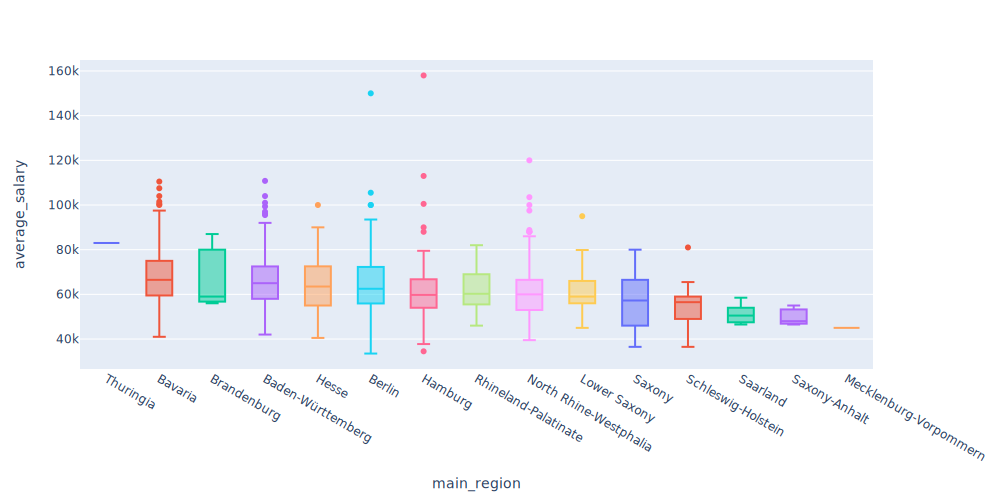

In [45]:
salaries = df_salary.groupby("main_region")["average_salary"].agg(["mean", "count"]).sort_values("mean", ascending=False)
fig = px.box(df_salary.dropna(subset=["main_region"]), x="main_region", y="average_salary", color="main_region", width=1000, height=500,
            category_orders={"main_region": salaries.index})
fig.update_layout(showlegend=False)
fig.show("svg")

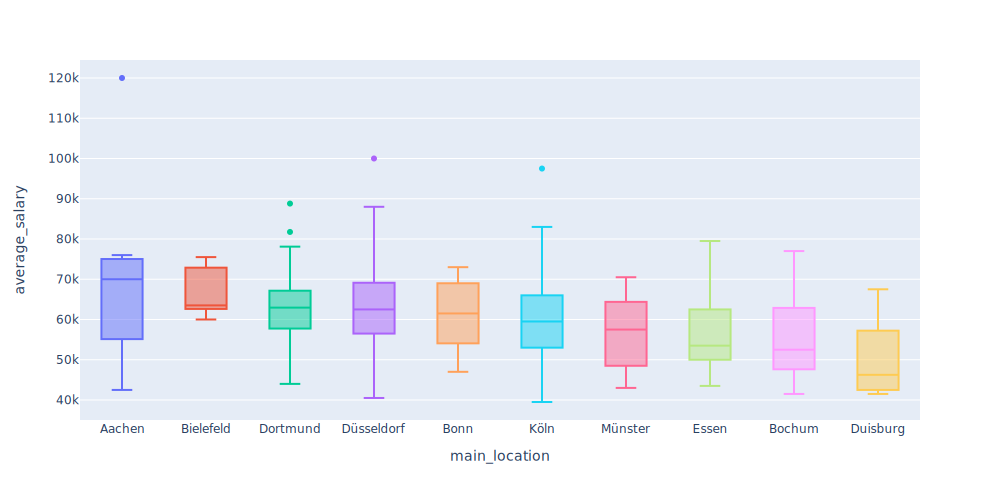

In [46]:
locations = df_salary.loc[df_salary["main_region"]=="North Rhine-Westphalia", "main_location"].value_counts().head(10)
top_locations = df_salary.loc[df_salary["main_location"].isin(locations.index)]
salaries = top_locations.groupby("main_location")["average_salary"].agg(["mean", "count"]).sort_values("mean", ascending=False)
fig = px.box(top_locations, x="main_location", y="average_salary", color="main_location", width=1000, height=500,
            category_orders={"main_location": salaries.index})
fig.update_layout(showlegend=False)
fig.show("svg")

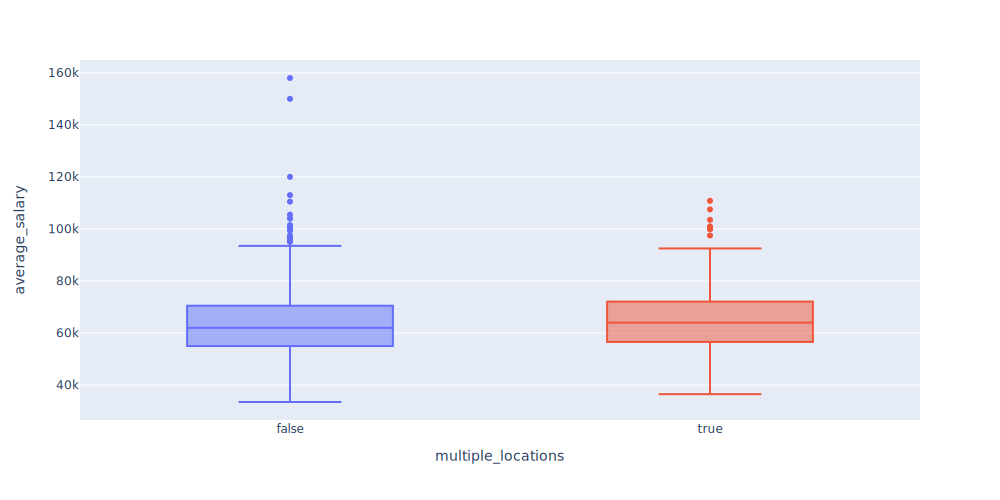

In [47]:
salaries = df_salary.groupby("multiple_locations")["average_salary"].mean().sort_values(ascending=False)
fig = px.box(df_salary, x="multiple_locations", y="average_salary", color="multiple_locations", width=1000, height=500)
fig.update_layout(showlegend=False)
fig.show("svg")

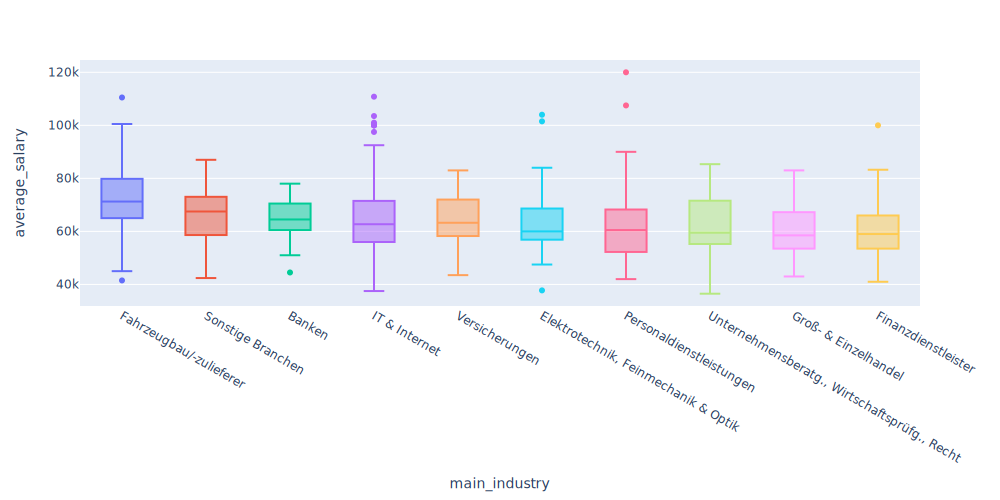

In [48]:
industries = df_salary["main_industry"].value_counts().head(10)
top_industries = df_salary.loc[df_salary["main_industry"].isin(industries.index)]
salaries = top_industries.groupby("main_industry")["average_salary"].agg(["mean", "count"]).sort_values("mean", ascending=False)
fig = px.box(top_industries, x="main_industry", y="average_salary", color="main_industry", width=1000, height=500,
            category_orders={"main_industry": salaries.index})
fig.update_layout(showlegend=False)
fig.show("svg")

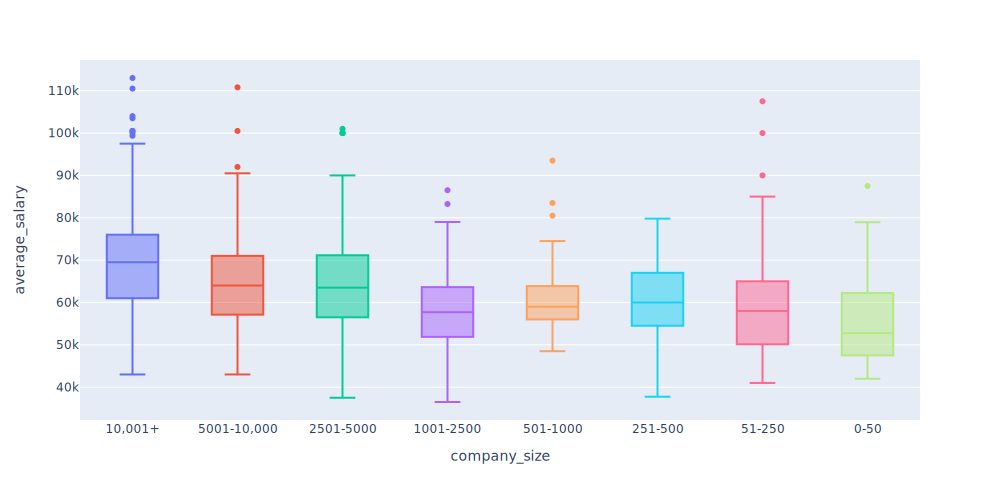

In [49]:
salaries = df_salary.groupby("company_size")["average_salary"].mean().sort_values(ascending=False)
fig = px.box(df_salary.dropna(subset=["company_size"]), x="company_size", y="average_salary", color="company_size", width=1000, height=500,
            category_orders={"company_size": ["10,001+", "5001-10,000", "2501-5000", "1001-2500", "501-1000", "251-500", "51-250", "0-50"]})
fig.update_layout(showlegend=False)
fig.show("svg")

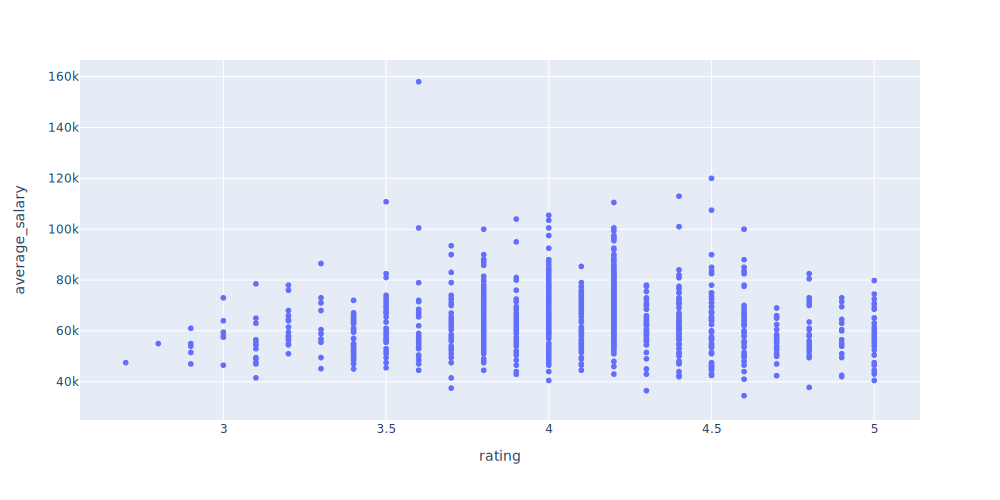

In [50]:
fig = px.scatter(df_salary, x="rating", y="average_salary", width=1000, height=500)
fig.show("svg")

Gewonnene Erkenntnisse:
- sowohl die Bundesländer als auch die Städte selber haben eine große Auswirkung auf das Gehalt
- in beiden Fällen existieren jedoch viele seltene Kategorien ==> beim späteren Modell auf genügend Regularisierung achten, um nicht auf diesen zu overfitten
- auch beim Feature "multiple locations" existiert ein geringer Unterschied
    - ob dieser Effekt auf diesem Feature beruht oder durch andere Features erklärt werden kann, ist nicht möglich zu beurteilen
- für Branche eines Unternehmens hat ebenfalls einen Einfluss auf das Gehalt
- größere Unternehmen zahlen im Schnitt auch größere Gehälter
- die Bewertung eines Unternehmens scheint nicht mit den gezahlten Gehältern zu korrelieren

#### Einfluss der erforderlichen Qualifikationen

Zu den erforderlichen Qualifikationen gehören:
- Menge der Berufserfahrung
- Art des Studienabschlusses
- Studiengang

Da Stepstone-Modell auch Prognosen für komplett andere Berufsfelder als Data Science abgeben muss, ist es sehr unwahrscheinlich, dass diese Modelle Data Science-spezifische Tools in seine Vorhersagen mit einbezieht. Daher werden extrahierte Skills wie Python oder SQL in dieser Analyse nicht mit ein Betracht gezogen.

In [51]:
def get_salary(s):
    return np.where(s, df_salary["average_salary"], np.nan)

In [52]:
df_experience = df_salary[["little_experience", "some_experience", "much_experience", "no_experience_information"]]
df_experience = df_experience.apply(get_salary)
df_experience.head()

,little_experience,some_experience,much_experience,no_experience_information
1,NaN,NaN,NaN,59500.0
2,NaN,NaN,NaN,62500.0
3,NaN,NaN,86000.0,NaN
4,NaN,NaN,NaN,61000.0
8,NaN,NaN,NaN,78000.0


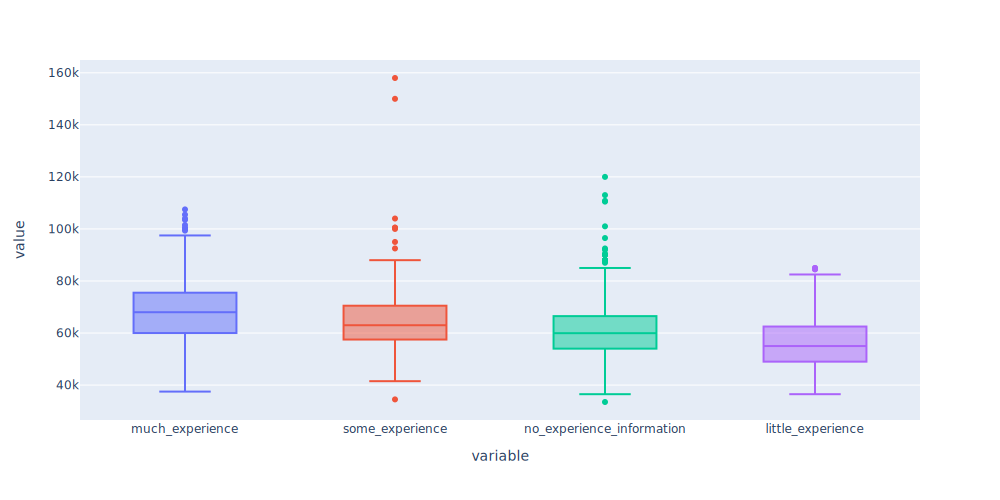

In [53]:
salaries = df_experience.mean().sort_values(ascending=False)
fig = px.box(df_experience, width=1000, height=500, color="variable",
            category_orders={"variable": salaries.index})
fig.update_layout(showlegend=False)
fig.show("svg")

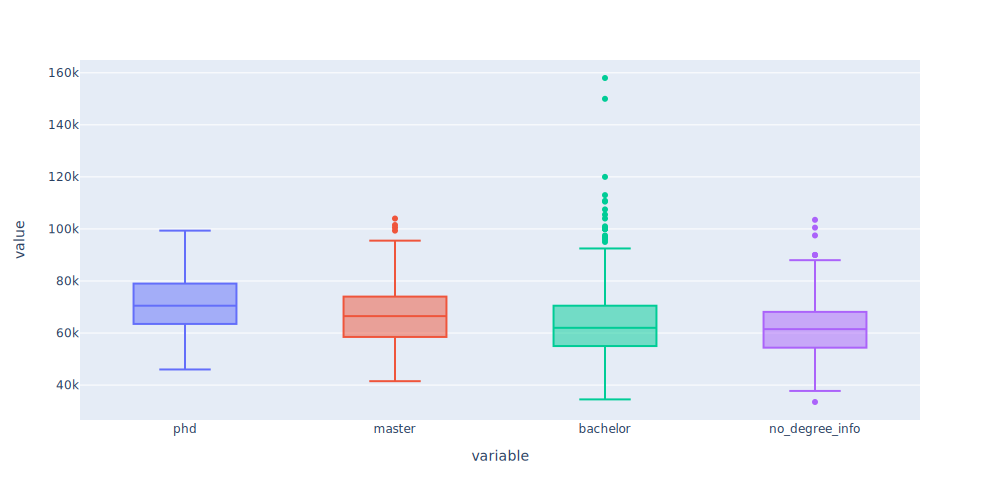

In [54]:
df_education = df_salary[["master", "phd", "bachelor", "no_degree_info"]]
df_education = df_education.apply(get_salary)

salaries = df_education.mean().sort_values(ascending=False)
fig = px.box(df_education, width=1000, height=500, color="variable",
            category_orders={"variable": salaries.index})
fig.update_layout(showlegend=False)
fig.show("svg")

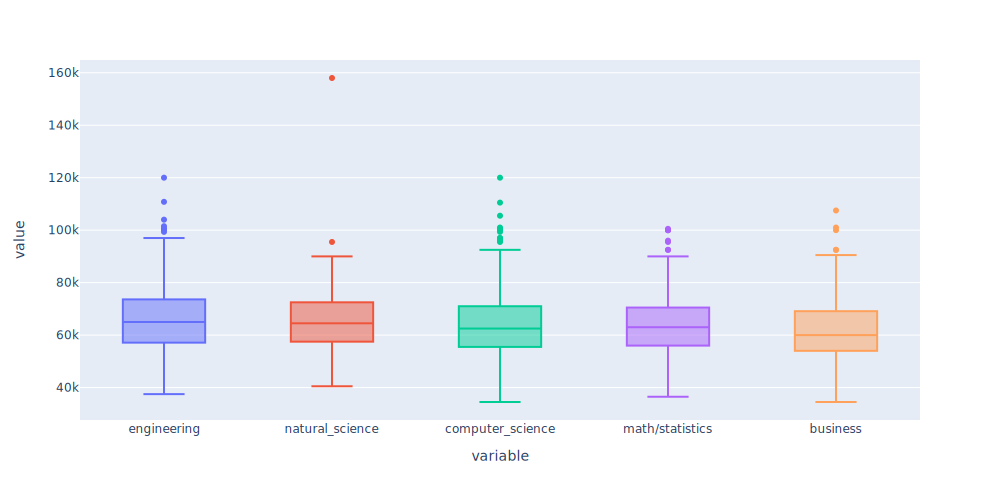

In [55]:
df_degree = df_salary[["computer_science", "math/statistics", "natural_science", "engineering", "business"]]
df_degree = df_degree.apply(get_salary)

salaries = df_degree.mean().sort_values(ascending=False)
fig = px.box(df_degree, width=1000, height=500, color="variable",
            category_orders={"variable": salaries.index})
fig.update_layout(showlegend=False)
fig.show("svg")

Gewonnene Erkentnisse:
- je größer die Berufserfahrung, desto höher ist das Gehalt
- je höher der Abschluss, desto höher ist das Gehalt
- die Durchschnittgehälter zwischen verschiedenen Studiengängen unterscheiden sich minimal
    - es sieht jedoch nicht danach aus, dass sich die Verteilungen für die verschiedenen Studiengänge signifikant unterschieden (Studiengang wurde wahrscheinlich nicht an das Modell integriert)